# Explore here

In [130]:
import pandas as pd
import requests
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler

from sklearn.feature_selection import mutual_info_regression, SelectKBest

from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

url = "https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv"
df = pd.read_csv(url)
df.to_csv("../data/raw/data.csv", index=False)
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


En el data set podemos observar un registro de 768 pacientes, 9 caracteristicas relevantes para la prediccion. Los datos estan en int64 y float64. 
Por otro lado, podemos ver que hay variables importantes, como *pregnancies*, *glucose*, *bloodpressure*, *bmi*.
Variable objetivo: *Outcome* donde 0: no tiene diabetes, 1: si tiene diabetes.

In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [132]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Podemos ver que en el Dataset no hay valores nulos. 

In [133]:
columns = ["Glucose", "Pregnancies", "Insulin", "BloodPressure", "Age", "BMI", "DiabetesPedigreeFunction", "SkinThickness"]
for col in columns:
    df[col] = df[col].replace(0, df[col].mean())

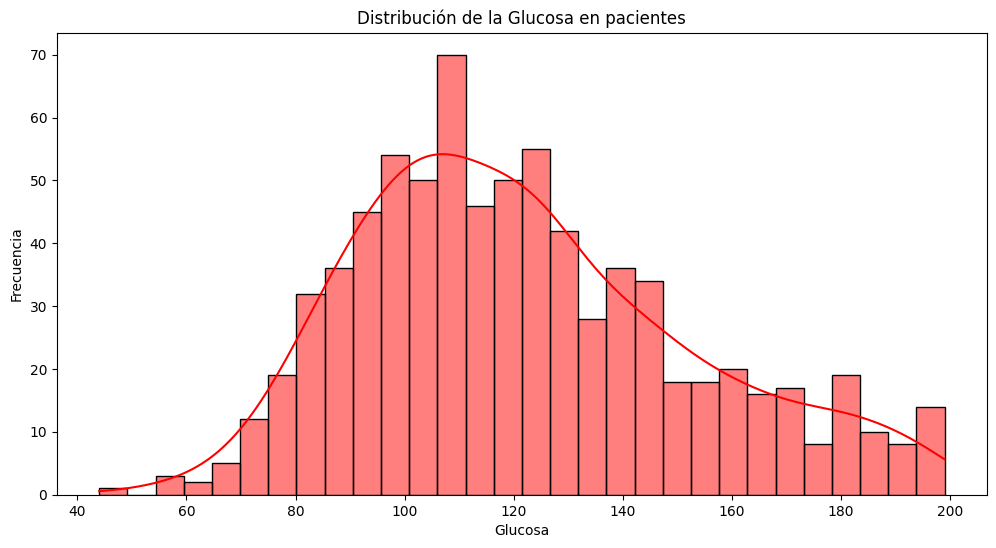

In [134]:
#Distribucion con la variable objetivo
plt.figure(figsize=(12, 6))
sns.histplot(df['Glucose'], bins=30, kde=True, color='red')
plt.title('Distribución de la Glucosa en pacientes')
plt.xlabel('Glucosa')
plt.ylabel('Frecuencia')
plt.show()

La mayoria de los valores se concentran en un rango de 80-140, indicando que algunos pacientes tienen niveles altos de glucosa es una señal de prevalencia de diabetes. 

In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    float64
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(7), int64(2)
memory usage: 54.1 KB


El dataset tiene 768 registros y 9 columnas, todas las variables sin valores nulos. Todas las caracteristicas son numericas, entre ellas 7 variables float, 1 variable int64, y nuestra variable objetivo *Outcome* que es binaria, la distribucion esta desbalancead ya que hay 500 casos no diabeticos y 268 diabeticos. 

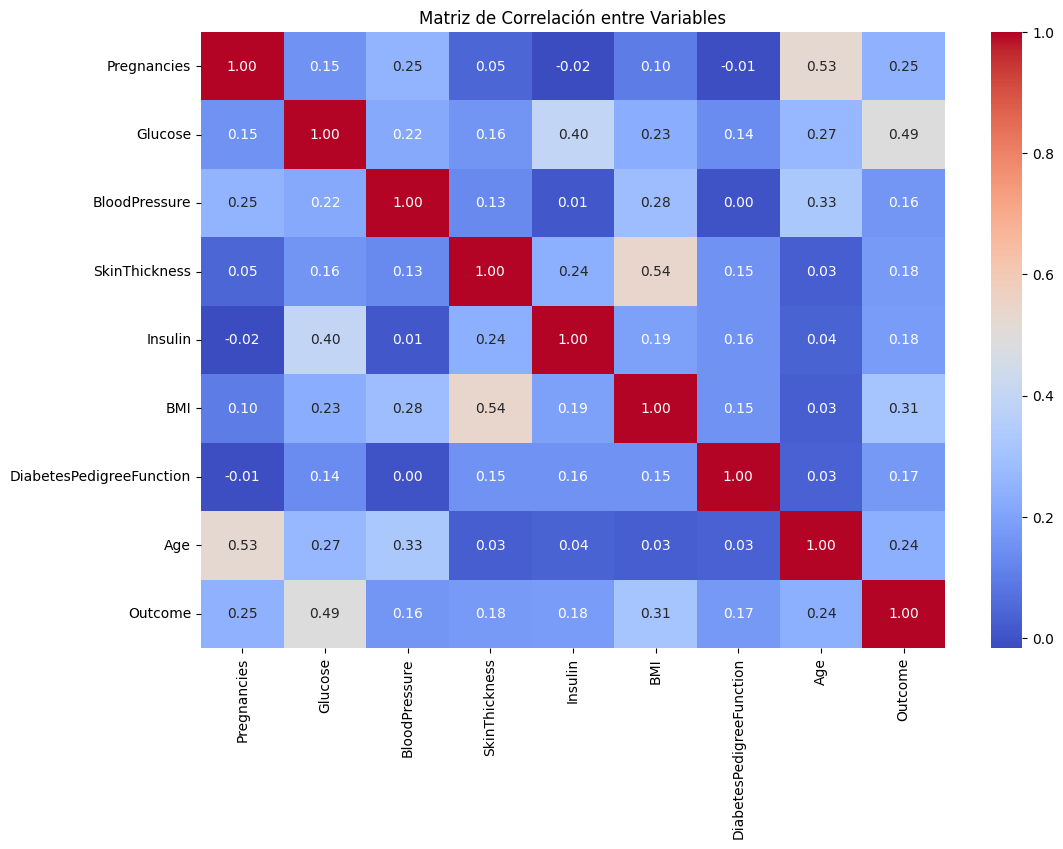

In [136]:
#Matriz de correlacion con todas las variables
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), cmap="coolwarm", annot=True, fmt=".2f")
plt.title("Matriz de Correlación entre Variables")
plt.show()

En nuestra matriz de correlacion podemos observar que *Glucose* tiene una correlación fuerte con *Outcome*, lo que indica que los niveles de glucosa son un buen predictor de diabetes.

*Age* y *Pregnancies* también tienen una correlación relativamente alta, lo cual es lógico ya que la cantidad de embarazos tiende a aumentar con la edad.

*BMI* muestra una correlación moderada con *SkinThickness*, es decir, que el grosor de la piel puede estar relacionado con el índice de masa corporal.

y por otro lado, que *Glucose*, *BMI* y *Age* tienen correlaciones más altas con Outcome, podrían ser variables clave para entrenar el modelo de predicción. Sin embargo, *insulin* y *BloodPressure* muentran correlacion bajas. 

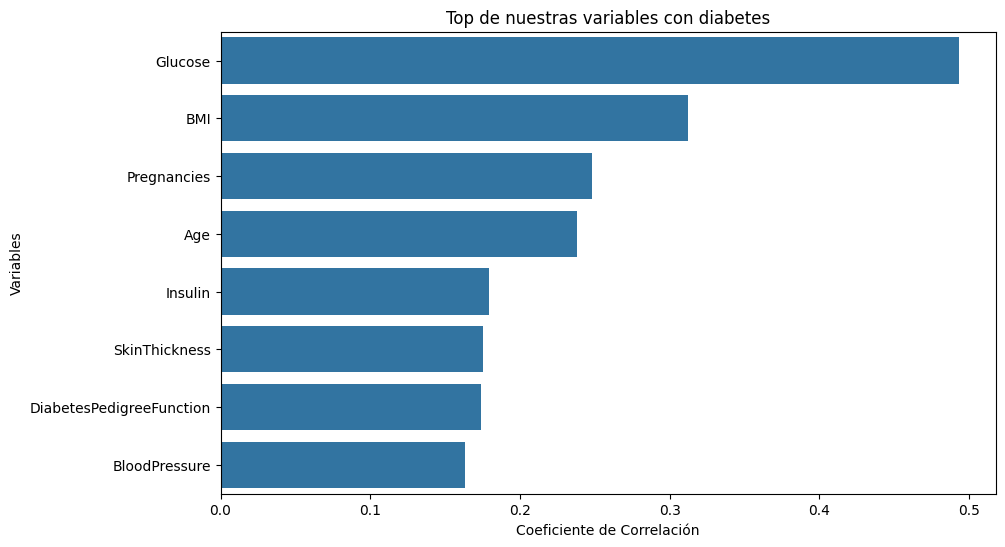

In [137]:
#Correlacion de nuestra variable objetivo con las demas. 

corr = df.corr(numeric_only=True)
corr_diabetes = corr["Outcome"].drop("Outcome").sort_values(ascending=False).head(8)
plt.figure(figsize=(10, 6))
sns.barplot(x=corr_diabetes.values, y=corr_diabetes.index, legend=False)
plt.xlabel("Coeficiente de Correlación")
plt.ylabel("Variables")
plt.title("Top de nuestras variables con diabetes")
plt.show()

En este grafico podemos deducir que el diabetes es mayormente influenciado por la glucosa y por el indice de grasa, en pocas palabras, aquellas personas que consumen muchos azucares y grasa son mas propensos a contraer el diabetes. 

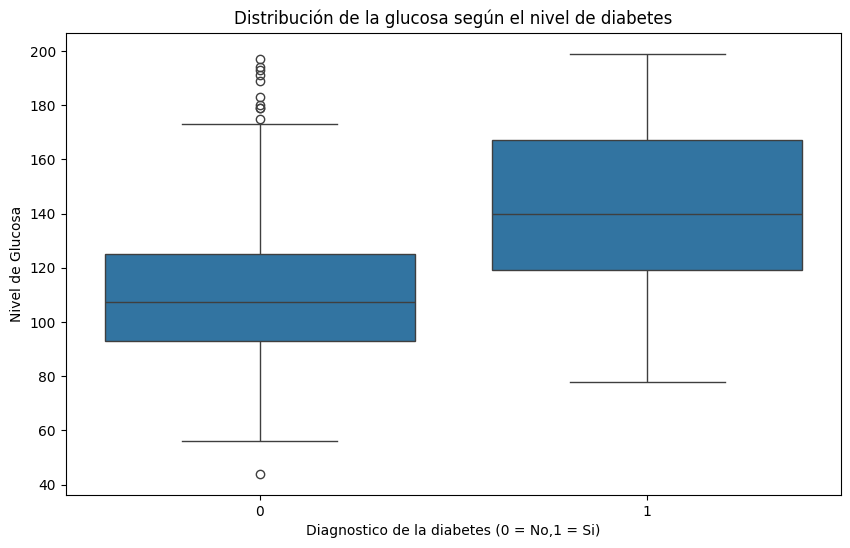

In [138]:
# Impacto de la glucosa con la diabetes
plt.figure(figsize=(10, 6))
sns.boxplot(x="Outcome", y="Glucose", data=df)
plt.title("Distribución de la glucosa según el nivel de diabetes")
plt.xlabel("Diagnostico de la diabetes (0 = No,1 = Si)")
plt.ylabel("Nivel de Glucosa")
plt.show()

El grafico nos muestra que hay mas pacientes con diabetes, y que hay algunos datos dentro de nuestro dataset dentro de acerca de los no, que pueden afectar a nuestro analisis y deducciones. 

La glucosa esta fuertemente relacionada con la diabetes.

In [139]:

# Definir características (X) y variable objetivo (y)

X = df.drop(columns=["Outcome"])
y = df["Outcome"] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Le hago un balanceo porque siento que los datos del nuestra variable objetivo van a afectar nuestro analisis dado que hay mas casos que no hay diabetes.

In [140]:
from imblearn.over_sampling import SMOTE 
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_scaled, y_train)

# Verificar nueva distribución
print(y_train_balanced.value_counts())


Outcome
0    400
1    400
Name: count, dtype: int64


In [141]:
#Modelo
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train_balanced, y_train_balanced)

#Predicciones
y_pred_test = model.predict(X_test_scaled)
y_pred_train = model.predict(X_train_balanced)
accuracy_y = accuracy_score(y_test, y_pred_test)
print(f"Precisión del modelo: {accuracy_y:.2f}")

conf_matrix = confusion_matrix(y_test, y_pred_test)
print("Matriz de confusión:")
print(conf_matrix)

# Reporte de clasificación con F1-score, precisión y recall
report = classification_report(y_test, y_pred_test)
print("Reporte de clasificación:")
print(report)




Precisión del modelo: 0.75
Matriz de confusión:
[[78 22]
 [17 37]]
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.82      0.78      0.80       100
           1       0.63      0.69      0.65        54

    accuracy                           0.75       154
   macro avg       0.72      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154



La precisión del modelo es 75%, lo que indica que clasifica correctamente la mayoría de los casos.
78 casos negativos → Pacientes no diabeticos.
22 falsos positivos → El modelo predijo diabetes cuando el paciente no la tenía.
17 falsos negativos → Pacientes con diabetes que el modelo clasificó erróneamente como sanos.
37 verdaderos positivos → Casos de diabetes.


Pacientes sin diabetes:
*Recall*: Predice la mayoria de casos sin diabetes. 
*Precision*: El modelo es bueno prediciendo pacientes sanos.

Pacientes con diabetes:

*Precisión*: En la predicion solo el 63% realmente lo son.
*Recall* el modelo identifica correctamente el 69%, dejando algunos sin detectar.

Aunque el modelo tiene un desempeño aceptable, aún hay falsos negativos (Outcome = 1 mal clasificados), lo cual es crítico en problemas médicos. Mejorar el recall de la clase 1 podría ayudar a identificar más casos de diabetes.

In [142]:
nuevo_paciente = [[2, 120, 70, 85, 20, 28.5, 0.5, 30]]

columns_df = ['Pregnancies', 'Glucose', 'BloodPressure', 'Insulin', 'SkinThickness',
              'BMI', 'DiabetesPedigreeFunction', 'Age']
nuevo_paciente_df = pd.DataFrame(nuevo_paciente, columns=X.columns)

nuevo_paciente_scaled = scaler.transform(nuevo_paciente_df)

# Predecir diagnóstico
prediccion = model.predict(nuevo_paciente_scaled)

# Resultado
resultado = "Tiene diabetes" if prediccion[0] == 0 else "No tiene diabetes"
print(f"Resultado del paciente: {resultado}")


Resultado del paciente: Tiene diabetes


In [143]:
# Árbol GINI
tree_gini = DecisionTreeClassifier(criterion="gini", random_state=42)
tree_gini.fit(X_train_scaled, y_train)

# Árbol ENTROPY
tree_entropy = DecisionTreeClassifier(criterion="entropy", random_state=42)
tree_entropy.fit(X_train_scaled, y_train)

# Predicciones
y_pred_gini = tree_gini.predict(X_test_scaled)
y_pred_entropy = tree_entropy.predict(X_test_scaled)

# Evaluación de precisión
acc_gini = accuracy_score(y_test, y_pred_gini)
acc_entropy = accuracy_score(y_test, y_pred_entropy)

print(f"Precisión con GINI: {acc_gini:.3f}")
print(f"Precisión con ENTROPY: {acc_entropy:.3f}")


Precisión con GINI: 0.708
Precisión con ENTROPY: 0.701


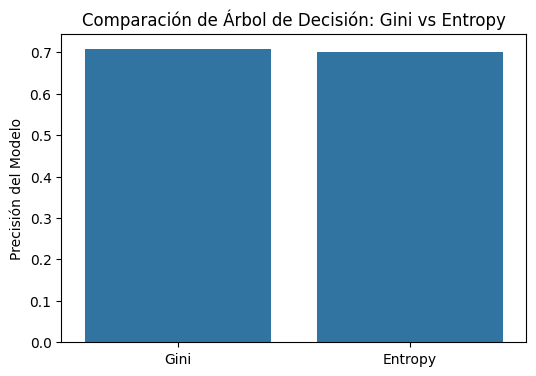

In [144]:
plt.figure(figsize=(6, 4))
sns.barplot(x=["Gini", "Entropy"], y=[acc_gini, acc_entropy])
plt.ylabel("Precisión del Modelo")
plt.title("Comparación de Árbol de Decisión: Gini vs Entropy")
plt.show()


Los resultados de precision mientran que el Arbol de Decision GINI tien un desempeño ligeramente mejor que el de ENTROPY. 
Podemos concluir que el criterio GINI tiene a ser mas rapido en calculos porque no usa algoritmos, y es mucho mas eficientes en odelos pequeños y medianos. A viceversa del criterio ENTROPY. Podria mejorarse usando otros modelos 

Ahora bien, para mejorar la predicción general y reducir el sobreajuste que a menudo ocurre con árboles individuales, vamos a entrenar un Random Forest y analizar cómo varían los resultados al modificar dos de sus hiperparámetros más importantes, *n_estimators* número y 
*max_depth* profundidad de los árboles

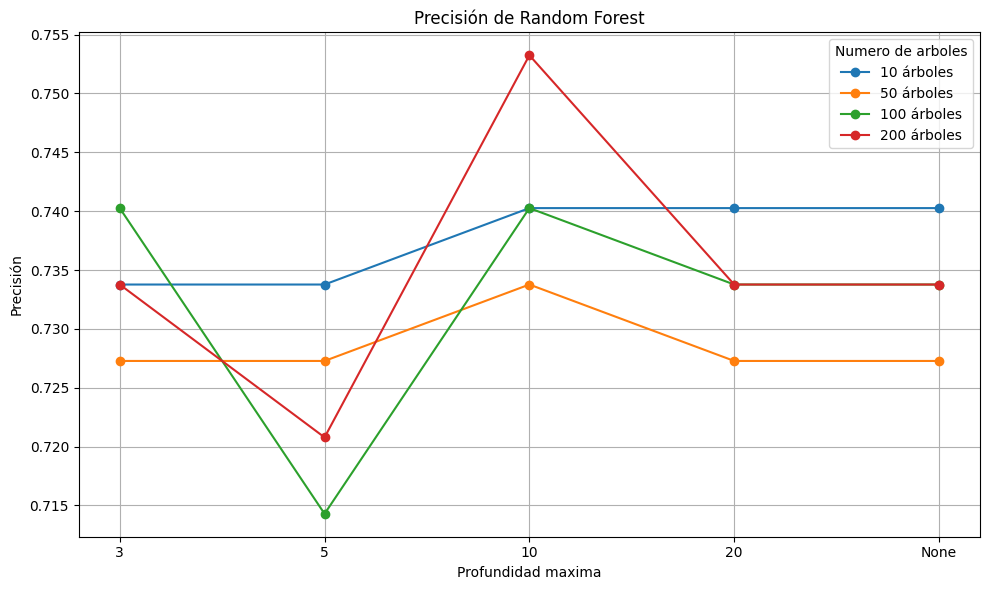

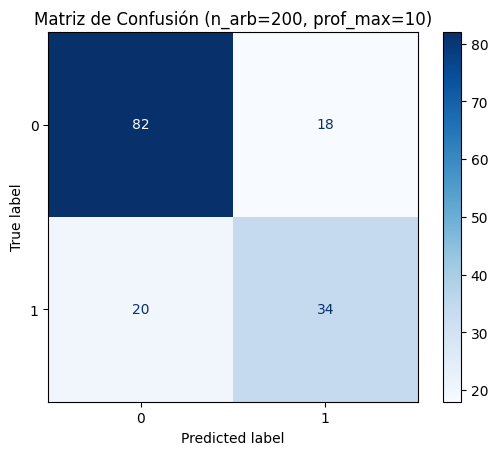

Mejor modelo -> n_estimators: 200, max_depth: 10, Precisión: 0.753


In [145]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# 
n_arb = [10, 50, 100, 200]
prof_max = [3, 5, 10, 20, None]
results = np.zeros((len(n_arb), len(prof_max)))

for i, n in enumerate(n_arb):
    for j, d in enumerate(prof_max):
        rf = RandomForestClassifier(n_estimators=n, max_depth=d, random_state=42)
        rf.fit(X_train_scaled, y_train)
        y_pred = rf.predict(X_test_scaled)
        acc = accuracy_score(y_test, y_pred)
        results[i, j] = acc

column_names = [str(d) for d in prof_max]
index_names = [f"{n}_trees" for n in n_arb]
df_results = pd.DataFrame(results, columns=column_names, index=index_names)

df_results.to_csv("resultados_random_forest.csv")

# Gráfica
plt.figure(figsize=(10, 6))
for i, n in enumerate(n_arb):
    plt.plot(column_names, results[i], marker='o', label=f'{n} árboles')
plt.title('Precisión de Random Forest')
plt.xlabel('Profundidad maxima')
plt.ylabel('Precisión')
plt.legend(title='Numero de arboles')
plt.grid(True)
plt.tight_layout()
plt.show()

# Mejor combinación
best_idx = np.unravel_index(np.argmax(results), results.shape)
best_n = n_arb[best_idx[0]]
best_d = prof_max[best_idx[1]]

# Matriz de confusión
best_rf = RandomForestClassifier(n_estimators=best_n, max_depth=best_d, random_state=42)
best_rf.fit(X_train_scaled, y_train)
y_best_pred = best_rf.predict(X_test_scaled)

cm = confusion_matrix(y_test, y_best_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title(f'Matriz de Confusión (n_arb={best_n}, prof_max={best_d})')
plt.savefig("matriz_confusion_rf.png")
plt.show()
print(f"Mejor modelo -> n_estimators: {best_n}, max_depth: {best_d}, Precisión: {results[best_idx]:.3f}")


El grafico de Precision de Random Forest, indica como varia la precision segun la profundidad, por ende en nuestro grafico podemos observar que el maximo rendimiento parece ser con 200 arboles y una profundidad de 10. Por otro lado, en la Matriz de confusion podemos ver los falsos positivos y negativos del modelo, y aqui vemos 82 negativos (pacientes no diabeticos), 18 falsos positivos, 20 falsos negativos y 34 positivos. 
El recall para nuestra variable objetivo sigue mejorando en relacion a los modelos anteriores, menos falsos negativos y la precision general esta aumentando. 